# LetsGrowMore (Virtual Internship Program)




# Stock Market Prediction and Forecasting Using Stacked LSTM

Author : Abhishek Singh

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [2]:
# import the Data

df = pd.read_csv('NSE-TATAGLOBAL.csv')
df = df.dropna()
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df_close = df['Close']

In [5]:
df_close.shape

(2035,)

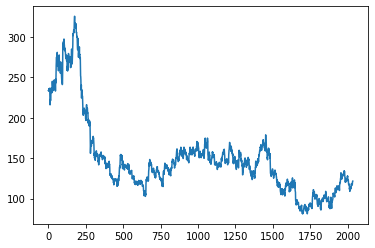

In [6]:
plt.plot(df_close)

since LSTM are sensitive to the scale of the data. So we apply MinMax scalar to transform our values between 0 and 1.

In [7]:
scaler_data = MinMaxScaler(feature_range=(0, 1))
df_close = scaler_data.fit_transform(np.array(df_close).reshape(-1, 1))

In [8]:
df_close.shape

(2035, 1)

In [9]:
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [10]:
# split the data into train and teat split

training_size = int(len(df_close) * 0.70)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0: training_size,:], df_close[training_size: len(df_close),:1]

In [11]:
# creating the function

def create_dataset(dataset, times_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - times_step - 1):
        b = dataset[i:(i+times_step), 0]
        dataX.append(b)
        dataY.append(dataset [i+times_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
times_step = 100
x_train, y_train = create_dataset(train_data, times_step)
x_test, y_test = create_dataset(test_data, times_step)


In [13]:
# Reshape the input

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [14]:
# Creating the LSTM Model

model_LSTM = Sequential()
model_LSTM.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model_LSTM.add(LSTM(50, return_sequences = True))
model_LSTM.add(LSTM(50))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [15]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fitting The Model

model_LSTM.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size=64, verbose = 1)

Epoch 1/100
21/21 [==============================] - 17s 309ms/step - loss: 0.0246 - val_loss: 0.0057
Epoch 2/100
21/21 [==============================] - 5s 248ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 3/100
21/21 [==============================] - 5s 250ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
21/21 [==============================] - 5s 248ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/100
21/21 [==============================] - 5s 247ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/100
21/21 [==============================] - 5s 260ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
21/21 [==============================] - 5s 253ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
21/21 [==============================] - 5s 250ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
21/21 [==============================] - 6s 275ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/100
21/21 [==============================] - 6s 265ms/step - loss: 9.9488e-04 - v

In [17]:
# Predicting and Checking performance matrics

train_predicted = model_LSTM.predict(x_train)
test_predicted = model_LSTM.predict(x_test)

In [18]:
#Transforming back to the original form

train_predicted = scaler_data.inverse_transform(train_predicted)
test_predicted = scaler_data.inverse_transform(test_predicted)

In [19]:
# Calculating RMSE performance matrics

math.sqrt(mean_squared_error(y_train, train_predicted))



163.88248113113914

In [20]:
# Test data RMSE

math.sqrt(mean_squared_error(y_test, test_predicted))


107.40779457056541

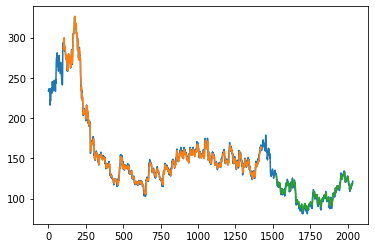

In [21]:
# Plotting

#Shifting train prediction for plotting

lb = 100
train_predicted_Plot = np.empty_like(df_close)
train_predicted_Plot[:,:] = np.nan
train_predicted_Plot[lb:len(train_predicted) + lb, :] = train_predicted

#Shifting Train Prediction for plotting

test_predicted_Plot = np.empty_like(df_close)
test_predicted_Plot[:,:] = np.nan
test_predicted_Plot[len(train_predicted) + (lb * 2) + 1: len(df_close) - 1, :] = test_predicted

#Plotting baseline and Predictions

plt.plot(scaler_data.inverse_transform(df_close))
plt.plot(train_predicted_Plot)
plt.plot(test_predicted_Plot)
plt.show()

predict the next 30 days Stock Price


In [22]:
len(test_data), x_test.shape

(611, (510, 100, 1))

In [23]:
x_input = test_data[511:].reshape(1, -1)
x_input.shape

(1, 100)

In [24]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [25]:
l_output = []
n_steps = 100
next_Number_Of_Days = 30
i = 0

while(i < next_Number_Of_Days):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {} ".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yp = model_LSTM.predict(x_input, verbose = 0)
        print("{} day output {} ".format(i, yp))
        temp_input.extend(yp[0].tolist())
        temp_input = temp_input[1:]
        l_output.extend(yp.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yp = model_LSTM.predict(x_input, verbose = 0)
        print(yp[0])
        temp_input.extend(yp[0].tolist())
        print(len(temp_input))
        l_output.extend(yp.tolist())
        i = i+1

print(l_output)

[0.16296959]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [26]:
new_day = np.arange(1,101)
day_pred = np.arange(101,131)

In [27]:
df2 = df_close.tolist()
df2.extend(l_output)

In [28]:
len(df_close)

2035

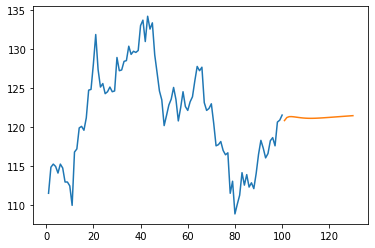

In [29]:
plt.plot (new_day, scaler_data.inverse_transform(df_close[1935:]))
plt.plot (day_pred, scaler_data.inverse_transform(l_output))